<a href="https://colab.research.google.com/github/eunicebalicanta/econ326-research/blob/main/ECON326_FinalPaper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Examining the Impact of Screen Time, Physical Health, and Mental Wellbeing on Youth Sleep Quality

####ECON 326 Final Research Paper
####Solo Advanced Track by Eunice Balicanta


---



**Dataset Description**: Provided by Kaggle, the Healthy Brain Network Dataset is a clinical sample of roughly 5,000 five to twenty-year olds who have undergone research screenings in New York. With rings rates of computer addiction, the goal of the study was to improve the diagnosis and interventions of mental and health and learning disorders. This data includes several measurements including internet usage surveys, bio-electric impedence analysis, physical activity questionnaire, youth demographics, and physical measures.







In [208]:
# Install the packages
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install statsmodels

# Read the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white

In [334]:
# Load the data dictionary
file_dictionary = '/content/drive/MyDrive/ECON 326 Project Code/Final Paper/child-mind-institute-problematic-internet-use (2)/data_dictionary.csv'
data_dicionary = pd.read_csv(file_dictionary)
data_dicionary.head()

,Instrument,Field,Description,Type,Values,Value Labels
0,Identifier,id,Participant's ID,str,NaN,NaN
1,Demographics,Basic_Demos-Enroll_Season,Season of enrollment,str,"Spring, Summer, Fall, Winter",NaN
2,Demographics,Basic_Demos-Age,Age of participant,float,NaN,NaN
3,Demographics,Basic_Demos-Sex,Sex of participant,categorical int,"0,1","0=Male, 1=Female"
4,Children's Global Assessment Scale,CGAS-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN


In [333]:
# Load the data
file_data = '/content/drive/MyDrive/ECON 326 Project Code/Final Paper/child-mind-institute-problematic-internet-use (2)/train.csv'
data = pd.read_csv(file_data)
data.head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [335]:
# Rename columns for better interpretibility
data.rename(columns={
    data.columns[data.columns.get_loc('Basic_Demos-Age')]: 'Age',
    data.columns[data.columns.get_loc('Basic_Demos-Sex')]: 'Sex',
    data.columns[data.columns.get_loc('SDS-SDS_Total_T')]: 'Sleep_Disturbance_Scale',
    data.columns[data.columns.get_loc('PreInt_EduHx-computerinternet_hoursday')]: 'Internet_Usage',
    data.columns[data.columns.get_loc('PCIAT-PCIAT_08')]: 'Social_Withdrawal',
    data.columns[data.columns.get_loc('Physical-BMI')]: 'BMI'
      }, inplace=True)

# Filter out unecessary variables and drop missing "NA" values
data = data[(data['Age'] >= 5) & (data['Age'] <= 12)]
data = data[['Age', 'Sex', 'Sleep_Disturbance_Scale', 'Internet_Usage', 'Social_Withdrawal', 'BMI']].dropna()
data.head()

,Age,Sex,Sleep_Disturbance_Scale,Internet_Usage,Social_Withdrawal,BMI
1,9,0,64.0,0.0,0.0,14.035590
2,10,1,54.0,2.0,2.0,16.648696
3,9,0,45.0,0.0,3.0,18.292347
6,10,0,40.0,3.0,1.0,19.660760
15,7,0,50.0,2.0,4.0,29.315775


In [336]:
# Create a table of summary statistics for each variable
summary_stats = data.describe()
summary_stats

,Age,Sex,Sleep_Disturbance_Scale,Internet_Usage,Social_Withdrawal,BMI
count,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000
mean,8.816695,0.345742,57.773830,0.800902,1.060914,18.047692
std,1.886064,0.475744,13.295994,0.993409,1.254208,3.965445
min,5.000000,0.000000,38.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,47.000000,0.000000,0.000000,15.450088
50%,9.000000,0.000000,55.000000,0.000000,1.000000,16.984480
75%,10.000000,1.000000,64.000000,2.000000,2.000000,19.682207
max,12.000000,1.000000,100.000000,3.000000,5.000000,44.554097


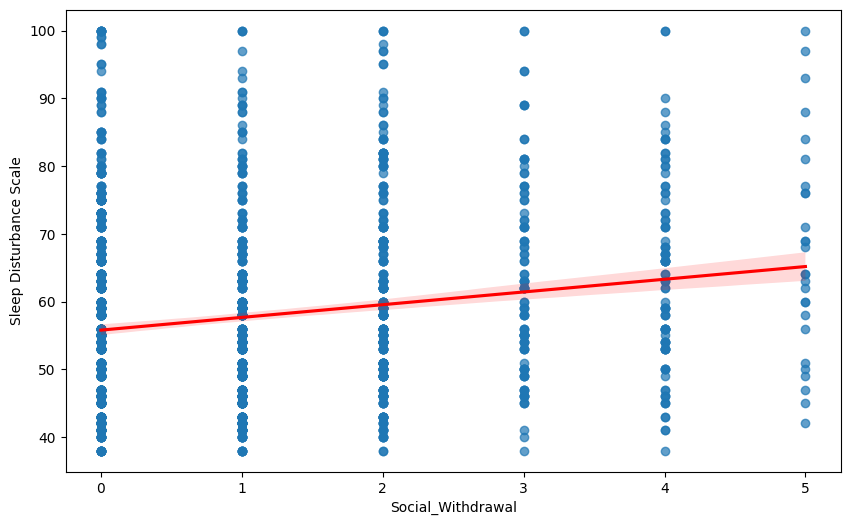

In [337]:
# Scatter plot with Best-Fit Line
plt.figure(figsize=(10, 6))
sns.regplot(x='Social_Withdrawal', y='Sleep_Disturbance_Scale', data=data, scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})
plt.ylabel("Sleep Disturbance Scale")
plt.show()

In [338]:
# Quantify correlations between variables(-1 to 1)
corr_matrix = data.corr()
print(corr_matrix)

                              Age       Sex  Sleep_Disturbance_Scale  \
Age                      1.000000  0.004633                 0.016462   
Sex                      0.004633  1.000000                -0.029830   
Sleep_Disturbance_Scale  0.016462 -0.029830                 1.000000   
Internet_Usage           0.243456 -0.053678                 0.080715   
Social_Withdrawal        0.267385 -0.080714                 0.177072   
BMI                      0.329951 -0.035843                 0.069439   

                         Internet_Usage  Social_Withdrawal       BMI  
Age                            0.243456           0.267385  0.329951  
Sex                           -0.053678          -0.080714 -0.035843  
Sleep_Disturbance_Scale        0.080715           0.177072  0.069439  
Internet_Usage                 1.000000           0.271085  0.202284  
Social_Withdrawal              0.271085           1.000000  0.139529  
BMI                            0.202284           0.139529  1.000000 

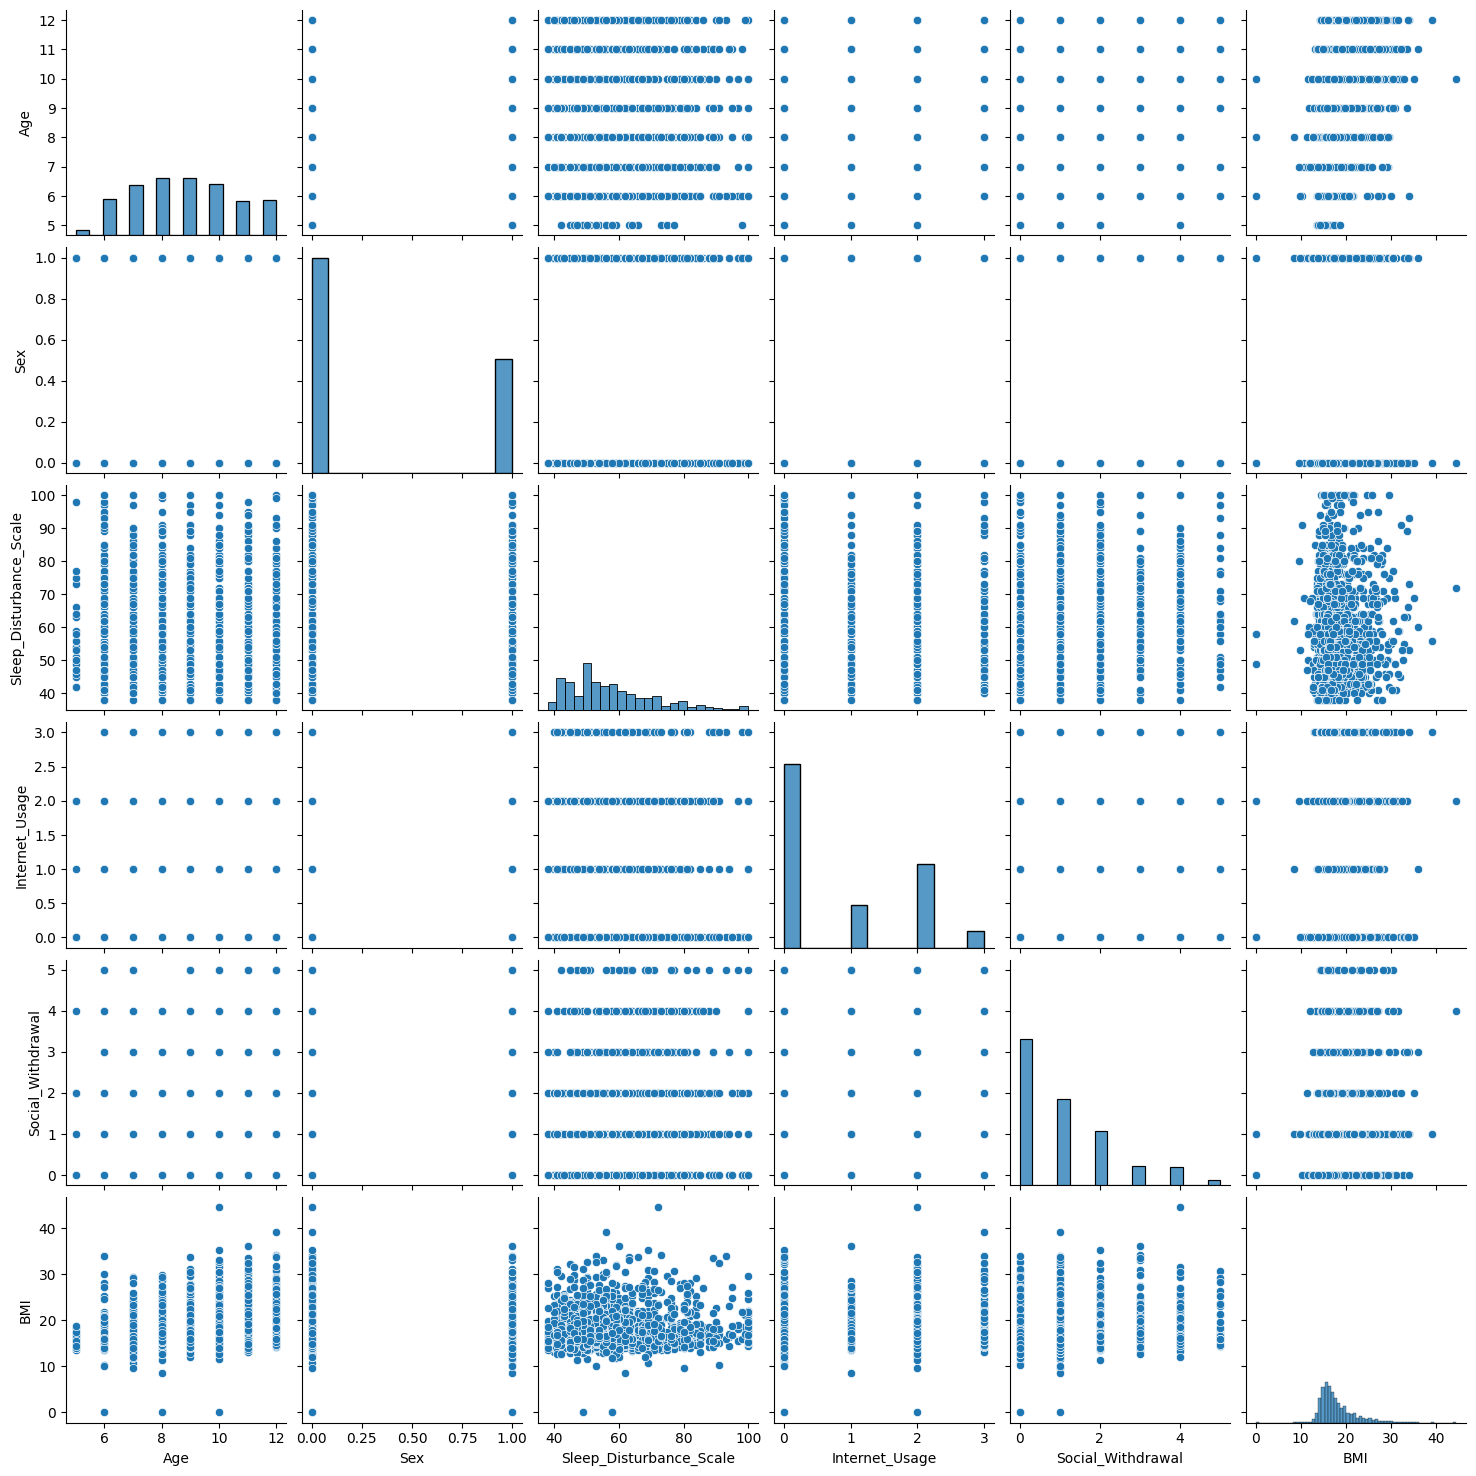

In [339]:
# Plot correlations
sns.pairplot(data)
plt.show()

In [327]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = data
X = add_constant(X)  # Adds a constant term for VIF calculation
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

                  Variable        VIF
0                    const  52.635200
1                      Age   1.218125
2                      Sex   1.009904
3  Sleep_Disturbance_Scale   1.038410
4           Internet_Usage   1.137412
5        Social_Withdrawal   1.170487
6                      BMI   1.147702


In [340]:
# Run a multiple regression
X = data.drop(columns=['Sleep_Disturbance_Scale'])
X = sm.add_constant(X)
Y = data['Sleep_Disturbance_Scale']
X = sm.add_constant(X)
reg = sm.OLS(Y, X).fit()

# See the results
print(reg.summary())

                               OLS Regression Results                              
Dep. Variable:     Sleep_Disturbance_Scale   R-squared:                       0.037
Model:                                 OLS   Adj. R-squared:                  0.034
Method:                      Least Squares   F-statistic:                     13.57
Date:                     Sat, 14 Dec 2024   Prob (F-statistic):           5.08e-13
Time:                             21:56:30   Log-Likelihood:                -7069.4
No. Observations:                     1773   AIC:                         1.415e+04
Df Residuals:                         1767   BIC:                         1.418e+04
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------